In [2]:
import pandas as pd

In [3]:
df =pd.read_csv('data/data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [16]:
import pandas as pd
from datetime import datetime

# Assuming you already have your df with "Order Placed At"
df["Order Placed At"] = pd.to_datetime(df["Order Placed At"])

# Get unique dates (just the date part)
unique_dates = df["Order Placed At"].dt.date.unique()

# Your major events dictionary
major_events_delhi = {
    "2024-01-01": {"event": "New Year’s Day", "holiday": True},
    "2024-01-14": {"event": "Makar Sankranti / Lohri / Pongal", "holiday": False},
    "2024-01-26": {"event": "Republic Day", "holiday": True},
    "2024-02-14": {"event": "Basant Panchami / Saraswati Puja", "holiday": False},
    "2024-03-25": {"event": "Holi", "holiday": False},
    "2024-03-30": {"event": "Ram Navami", "holiday": False},
    "2024-04-17": {"event": "Mahavir Jayanti", "holiday": False},
    "2024-04-19": {"event": "Good Friday", "holiday": True},
    "2024-04-21": {"event": "Easter Sunday", "holiday": False},
    "2024-05-23": {"event": "Buddha Purnima", "holiday": False},
    "2024-06-17": {"event": "Rath Yatra", "holiday": False},
    "2024-07-16": {"event": "Guru Purnima", "holiday": False},
    "2024-08-17": {"event": "Raksha Bandhan", "holiday": False},
    "2024-08-15": {"event": "Independence Day", "holiday": True},
    "2024-08-26": {"event": "Janmashtami", "holiday": False},
    "2024-09-07": {"event": "Ganesh Chaturthi", "holiday": False},
    "2024-09-08": {"event": "Navratri Begins", "holiday": False},
    "2024-09-05": {"event": "Teachers’ Day", "holiday": False},
    "2024-09-17": {"event": "Muharram", "holiday": False},
    "2024-10-12": {"event": "Dussehra / Vijayadashami", "holiday": False},
    "2024-11-01": {"event": "Diwali / Deepavali", "holiday": False},
    "2024-11-02": {"event": "Govardhan Puja / Annakut", "holiday": False},
    "2024-11-03": {"event": "Bhai Dooj", "holiday": False},
    "2024-11-15": {"event": "Guru Nanak Jayanti / Gurpurab", "holiday": False},
    "2024-11-02": {"event": "Karva Chauth", "holiday": False},
    "2024-12-25": {"event": "Christmas Day", "holiday": True},
    "2024-12-31": {"event": "New Year’s Eve", "holiday": False}
}

# Build a new DataFrame
event_data = []
for d in unique_dates:
    d_str = d.isoformat()  # convert datetime.date to 'YYYY-MM-DD'
    info = major_events_delhi.get(d_str, {"event": "No significant event", "holiday": False})
    event_data.append({
        "date": d,
        "event": info["event"],
        "holiday": info["holiday"]
    })

df_events = pd.DataFrame(event_data)

In [17]:
df_events

,date,event,holiday
0,2024-09-10,No significant event,False
1,2024-09-09,No significant event,False
2,2024-09-08,Navratri Begins,False
3,2024-09-07,Ganesh Chaturthi,False
4,2024-09-06,No significant event,False
...,...,...,...
148,2025-01-25,No significant event,False
149,2025-01-24,No significant event,False
150,2025-01-23,No significant event,False
151,2025-01-22,No significant event,False


In [18]:
# Export the DataFrame to CSV
df_events.to_csv("delhi_major_events.csv", index=False)

print("CSV file 'delhi_major_events.csv' created successfully!")


CSV file 'delhi_major_events.csv' created successfully!


In [19]:
df_events[df_events["event"] != "No significant event"]

,date,event,holiday
2,2024-09-08,Navratri Begins,False
3,2024-09-07,Ganesh Chaturthi,False
5,2024-09-05,Teachers’ Day,False
13,2024-09-17,Muharram,False
48,2024-10-12,Dussehra / Vijayadashami,False
68,2024-11-03,Bhai Dooj,False
69,2024-11-02,Karva Chauth,False
70,2024-11-01,Diwali / Deepavali,False
76,2024-11-15,Guru Nanak Jayanti / Gurpurab,False
111,2024-12-31,New Year’s Eve,False


In [ ]:
import pandas as pd

# Ensure datetime
df["Order Placed At"] = pd.to_datetime(df["Order Placed At"])

# Extract date part for merging
df["order_date"] = df["Order Placed At"].dt.date

# Ensure df_events['date'] is datetime.date
df_events["date"] = pd.to_datetime(df_events["date"]).dt.date

# Merge with all original columns intact
df_merged = df.merge(df_events, left_on="order_date", right_on="date", how="left")

# Drop the duplicate 'date' column from df_events
df_merged.drop(columns=["date"], inplace=True)


Merged CSV with all original columns and event info created successfully!


In [21]:
df_merged.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,order_date,event,holiday
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,2024-09-10 23:38:00,Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,2024-09-10,No significant event,False
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,2024-09-10 23:34:00,Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2024-09-10,No significant event,False
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,2024-09-10 15:52:00,Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,2024-09-10,No significant event,False
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,2024-09-10 15:45:00,Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2024-09-10,No significant event,False
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,2024-09-10 15:04:00,Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2024-09-10,No significant event,False


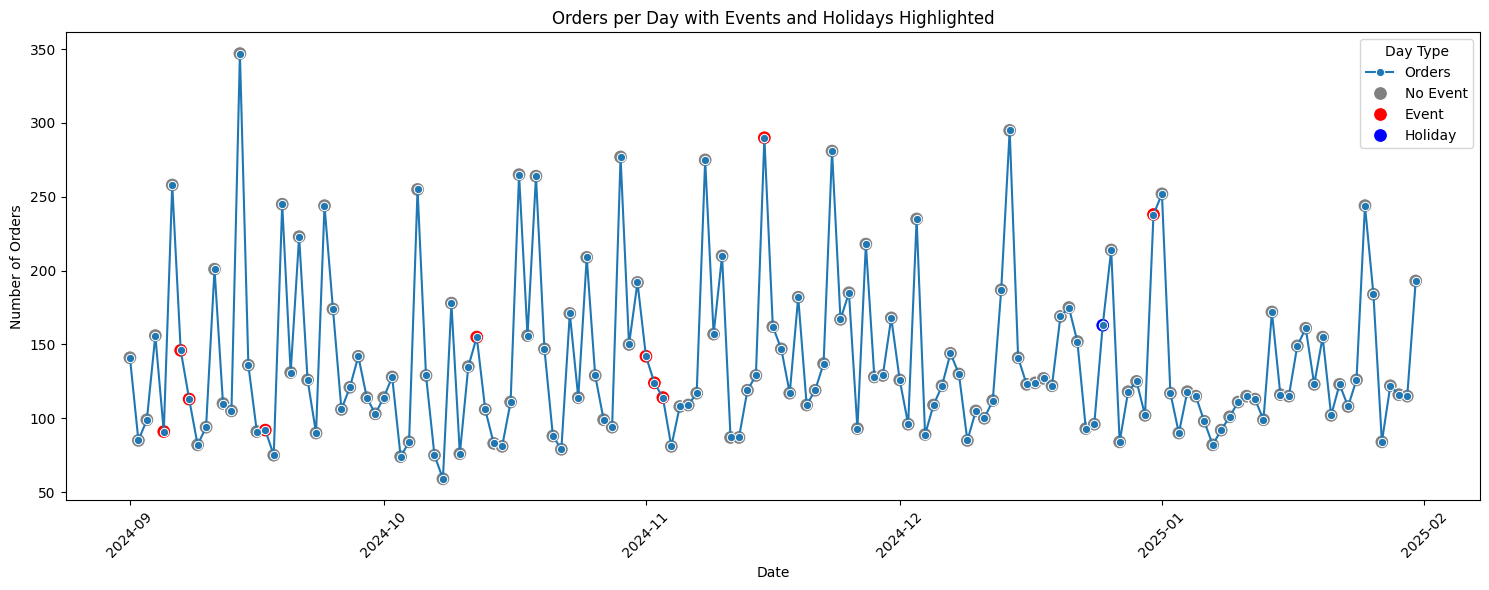

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure order_date exists
df_merged['order_date'] = pd.to_datetime(df_merged['Order Placed At']).dt.date

# Aggregate orders per day
orders_per_day = df_merged.groupby('order_date').size().reset_index(name='num_orders')

# Merge event info
event_info = df_merged[['order_date', 'event', 'holiday']].drop_duplicates(subset='order_date')
orders_per_day = orders_per_day.merge(event_info, on='order_date', how='left')

# Create a new column for hue: 'Holiday', 'Event', 'No Event'
def categorize(row):
    if row['holiday']:
        return 'Holiday'
    elif row['event'] != "No significant event":
        return 'Event'
    else:
        return 'No Event'

orders_per_day['event_type'] = orders_per_day.apply(categorize, axis=1)

# Plot with hue
plt.figure(figsize=(15,6))
sns.lineplot(x='order_date', y='num_orders', data=orders_per_day, marker='o', label='Orders')
sns.scatterplot(
    x='order_date',
    y='num_orders',
    hue='event_type',
    data=orders_per_day,
    palette={'Holiday':'blue', 'Event':'red', 'No Event':'grey'},
    s=100,
    legend='full'
)

plt.title("Orders per Day with Events and Holidays Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()
